<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

#### Load the first dataset and check the first two observations

In [2]:
df = pd.read_csv('whitewine.csv',sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.shape

(4898, 12)

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

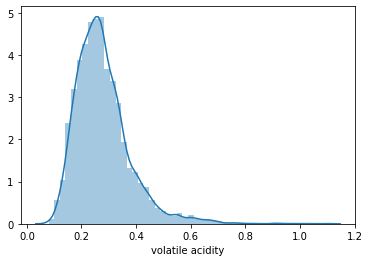

In [5]:
sns.distplot(df['volatile acidity'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

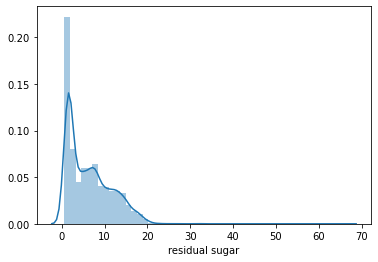

In [6]:
sns.distplot(df['residual sugar'])
plt.show()

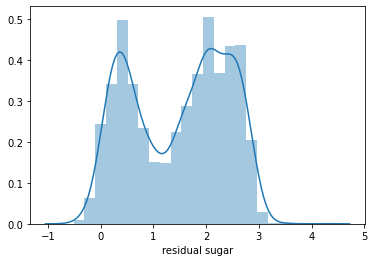

In [7]:
sns.distplot(np.log(df['residual sugar']))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

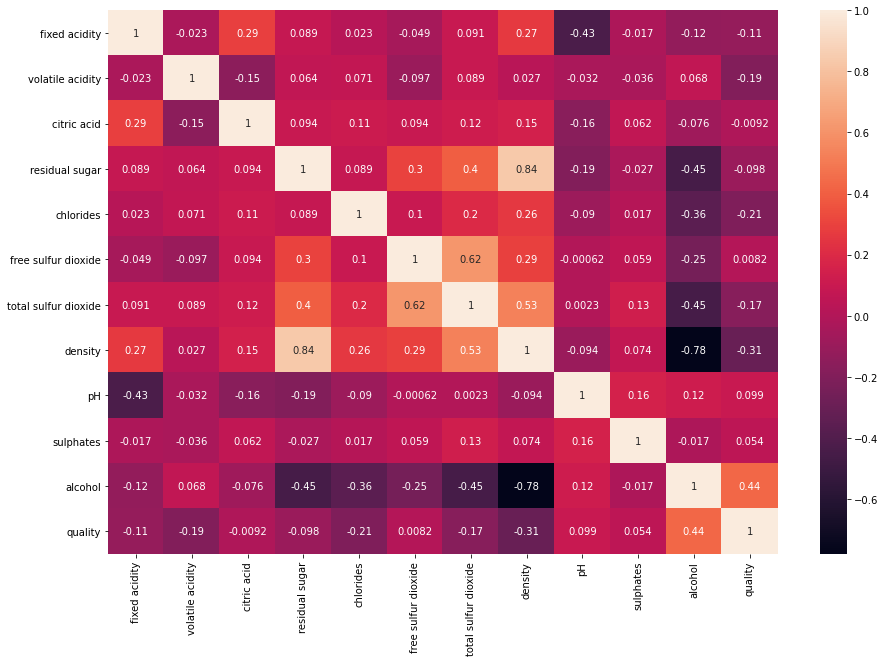

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

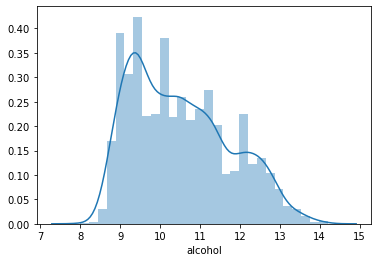

In [10]:
sns.distplot(df['alcohol'])
plt.show()

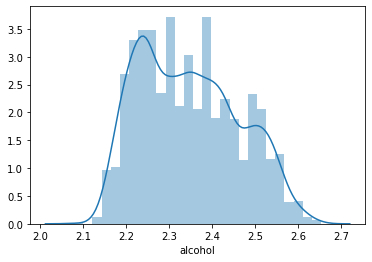

In [11]:
sns.distplot(np.log(df['alcohol']))
plt.show()

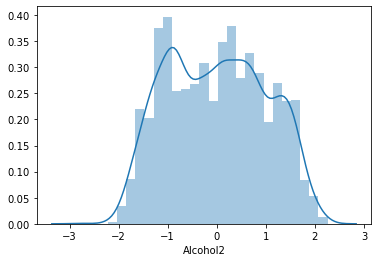

In [12]:
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer()

df2 = df.copy()

df2['Alcohol2'] = pt.fit_transform(df2[['alcohol']])

sns.distplot(df2['Alcohol2'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
y = df['quality']
X = df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:53:45   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df3= df.copy()
df3['phs'] = ss.fit_transform(df3[['pH']])
df3.drop('pH',axis=1,inplace=True)

y = df3['quality']
X = df3.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:55:26   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
phs                      0.1036      0.016      6.513      0.000       0.072       0.135
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
y = df['quality']
X = df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif , index=Xc.columns ,columns=['vif'])

,vif
const,3.067856e+06
fixed acidity,2.691435e+00
volatile acidity,1.141156e+00
citric acid,1.165215e+00
residual sugar,1.264406e+01
chlorides,1.236822e+00
free sulfur dioxide,1.787880e+00
total sulfur dioxide,2.239233e+00
density,2.823255e+01
pH,2.196362e+00


In [19]:
Xc.corr()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,NaN,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,NaN,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,NaN,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,NaN,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,NaN,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,NaN,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,NaN,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,NaN,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
y = df['quality']
X = df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:08:18   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y = df['quality']
X = df.drop(['quality','citric acid','chlorides','total sulfur dioxide'],axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:08:42   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062     18.100      8.514      0.000     118.622     189.591
fixed acidity           0.0681      0.020      3.333      0.001       0.028       0.108
volatile acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

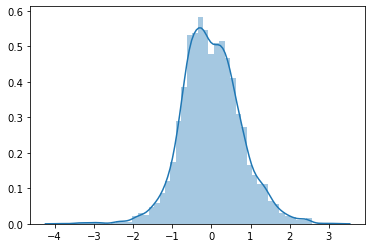

In [46]:
residuals = model.resid
sns.distplot(residuals)
plt.show()

In [ ]:
Jarque Berra Test is Avilable above and based on the probabilty we will conclude that residuals are not normally distributed.
Hence, the assumption of Normality of residuals is violeted.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
y = df['quality']
X = df.drop(['quality','chlorides','total sulfur dioxide'],axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:55   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.3717     18.186      8.488      0.000     118.718     190.025
fixed acidity           0.0678      0.021      3.299      0.001       0.027       0.108
volatile acidity       -1.8855      0.111    -16.995      0.000      -2.103      -1.668
citric acid             0.0144      0.095      0.152      0.879      -0.172       0.201
residual sugar          0.0829      0.007     11.348      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.921      0.000       0.002       0.005
density              -154.5631     18.433     -8.385      0.000    -190.701    -118.426
pH                      0.6958      0.104      6.696      0.000       0.492       0.900
sulphates               0.6279      0.100      6.275      0.000       0.432       0.824
alcohol                 0.1928      0.024      7.969      0.000       0.145       0.240
==============================================================================
Omnibus:                      114.278   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.434
Skew:                           0.075   Prob(JB):                     2.52e-55
Kurtosis:                       4.100   Cond. No.                     9.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
df4 = df.copy()
y = df4['quality']

df4['lcitric'] = np.log1p(df4['citric acid'])
X = df4.drop(['quality','citric acid','chlorides','total sulfur dioxide'],axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:20:17   Log-Likelihood:                -5543.9
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4888   BIC:                         1.117e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 155.2199     18.188      8.534      0.000     119.564     190.876
fixed acidity           0.0666      0.021      3.240      0.001       0.026       0.107
volatile acidity       -1.8750      0.111    -16.820      0.000      -2.094      -1.656
residual sugar          0.0832      0.007     11.384      0.000       0.069       0.098
free sulfur dioxide     0.0033      0.001      4.882      0.000       0.002       0.005
density              -155.4336     18.435     -8.432      0.000    -191.574    -119.293
pH                      0.7009      0.104      6.746      0.000       0.497       0.905
sulphates               0.6257      0.100      6.252      0.000       0.430       0.822
alcohol                 0.1916      0.024      7.913      0.000       0.144       0.239
lcitric                 0.0834      0.133      0.629      0.529      -0.176       0.343
==============================================================================
Omnibus:                      114.591   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.178
Skew:                           0.076   Prob(JB):                     1.74e-55
Kurtosis:                       4.101   Cond. No.                     9.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
NO. Transformation of Citric Acid is not changing the prediction quality.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
y = df['quality']
X = df.drop(['quality','citric acid','chlorides','total sulfur dioxide'],axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:22:17   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062     18.100      8.514      0.000     118.622     189.591
fixed acidity           0.0681      0.020      3.333      0.001       0.028       0.108
volatile acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(1.0604693517732817, 0.07337601817616714)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df = pd.read_csv('whitewine.csv',sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [24]:
y = df['quality']
X = df.drop('quality',axis=1)

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
sfsi = sfs(lr , k_features= 5 , scoring='r2',cv=3 , forward = True)
sfsi.fit(X,y)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [43]:
print('The five features selected are : ',sfsi.k_feature_names_)
print('The R2 value for the model with 5 features is :',sfsi.k_score_)

The five features selected are :  ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol')
The R2 value for the model with 5 features is : 0.24446306073537868


.






. 

In [44]:
index = pd.DataFrame(sfsi.subsets_ ).T['feature_idx'][5]
TopFiveCol = df.columns[np.array(index)]
print('Top five Best Feature:')
for i in TopFiveCol:
    print(i)

Top five Best Feature:
volatile acidity
residual sugar
free sulfur dioxide
sulphates
alcohol


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
y = df['quality']
X = df[TopFiveCol]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr= LinearRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
print('r2-train',r2_score(y_train,y_train_pred))

y_test_pred = lr.predict(X_test)

print('\n')
print('r2-test',r2_score(y_test,y_test_pred))


r2-train 0.27278504273520077


r2-test 0.24950246137411114


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
from sklearn.feature_selection import RFE

rfe = RFE(lr,n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [55]:
TopFiveFet = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['rank']).index
print('Top five Best Feature:')
for i in TopFiveFet:
    print(i)

Top five Best Feature:
volatile acidity
residual sugar
free sulfur dioxide
sulphates
alcohol


In [52]:
rfe.score(X,y)

0.26688090719411617

In [60]:
print('The R2 value for the model with 5 features through forward selection :',sfsi.k_score_)
print('The R2 value for the model with 5 features through backward selection :',rfe.score(X,y))

The R2 value for the model with 5 features through forward selection : 0.24446306073537868
The R2 value for the model with 5 features through backward selection : 0.26688090719411617


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
y = df['quality']
X = df.drop('quality',axis=1)

SFS = sfs(lr , k_features= (2,6) , scoring='r2',cv=5 , forward = True)
SFS.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(2, 6),
                          scoring='r2')

In [73]:
sfs_df = pd.DataFrame(SFS.subsets_).T

In [74]:
sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]['feature_names']

6    (volatile acidity, residual sugar, free sulfur...
Name: feature_names, dtype: object

In [75]:
SFS.k_score_

0.24672544391306897

In [76]:
SFS.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'alcohol')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
y=df['quality']
X=df.drop(columns='quality')

lr=LinearRegression()

SFS= sfs(lr,k_features=len(X.columns),forward=True,cv=5)
SFS.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=11)

In [82]:
sfs_df=pd.DataFrame(SFS.subsets_).T

features=list(sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]['feature_names'])
num_of_var=len(features[0])
R2_val = sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]['avg_score'].values

print('Number of features selected = ',num_of_var)
print('Feature names : ',features)
print('R2 value of the model with these features : ',R2_val)

Number of features selected =  7
Feature names :  [('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')]
R2 value of the model with these features :  [0.24706598333977609]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
rfe = RFE(lr,n_features_to_select=len(X.columns))
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=11)

In [84]:
rfe_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['rank'])
rfe_df

,rank
fixed acidity,1
volatile acidity,1
citric acid,1
residual sugar,1
chlorides,1
free sulfur dioxide,1
total sulfur dioxide,1
density,1
pH,1
sulphates,1


In [85]:
from sklearn.model_selection import KFold, GridSearchCV

y=df['quality']
X=df.drop(columns='quality')

lr = LinearRegression()

kfold = KFold(n_splits=5,shuffle=True,random_state=4)

rfe = RFE(lr)

params=[{'n_features_to_select':list(range(1,12))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2',cv=kfold)

gsearch.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             scoring='r2')

In [86]:
gsearch.best_params_

{'n_features_to_select': 10}

In [88]:
rfe= RFE (lr,n_features_to_select=10)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [89]:
print('R2 of Backward elimination :',rfe.score(X,y))
print('R2 of Forward elimination :',R2_val)

R2 of Backward elimination : 0.2817864006236631
R2 of Forward elimination : [0.24706598333977609]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
from sklearn.model_selection import KFold, GridSearchCV

y=df['quality']
x=df.drop(columns='quality')

lr = LinearRegression()

kfold = KFold(n_splits=5,shuffle=True,random_state=4)

rfe = RFE(lr)

params=[{'n_features_to_select':list(range(1,12))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2',cv=kfold)

gsearch.fit(x,y)
gsearch.best_params_

{'n_features_to_select': 10}

In [99]:
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [100]:
rfe.score(x,y)

0.2817864006236631

In [101]:
rfe_df = pd.DataFrame(rfe.support_,index=x.columns,columns=['Selected'])
sel_feat = rfe_df[rfe_df['Selected']==True].index

In [102]:
rfe_df

,Selected
fixed acidity,True
volatile acidity,True
citric acid,True
residual sugar,True
chlorides,True
free sulfur dioxide,True
total sulfur dioxide,False
density,True
pH,True
sulphates,True


In [103]:
sel_feat

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [104]:
x=df[sel_feat]
y=df['quality']

lr=LinearRegression()

lr.fit(x,y)

LinearRegression()

In [105]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=5,shuffle=True,random_state=0)
cv= cross_val_score(lr,x,y,cv=kfold,scoring='r2')

print('Mean R2 for Linear model with selected features : ',cv.mean())

Mean R2 for Linear model with selected features :  0.2751288001076342


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

sfs= SFS(lr,k_features=5,forward=True,cv=5)
sfs.fit(x,y)

features= list(sfs.k_feature_names_)

x=x[features]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state=0)

lr.fit(xtrain,ytrain)

ypred_train = lr.predict(xtrain)
ypred_test  = lr.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test  = np.sqrt(mean_squared_error(ytest, ypred_test))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)

RMSE for train :  0.7479748203145226
RMSE for test  : 0.7752166803057903


In [107]:
lr.score(xtrain,ytrain)

0.2756966066772022

In [108]:
lr.score(xtest,ytest)

0.25690758676673964

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here